# Linear Regression with the Boston Housing Dataset
Author: Nico Kuijpers  
Date: June 22, 2022

This notebook is adapted from the following resources: 

* *Chapter 10 - Predicting Continuous Target Variables with Regression Analysis* from Sebastian Raschka's book [Python Machine Learning](http://is.gd/ULX1Ee).

* *Linear Regression on Boston Housing
Dataset* by Animesh Agarwal:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

* *A simple regression analysis on the Boston housing data* from
Scipy lecture notes:
https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html

* *OLS Regression: Boston Housing Dataset* from DataSklr:
https://www.datasklr.com/ols-least-squares-regression/ols-regression-boston-housing-dataset

In this notebook, we use the [Seaborn module](http://stanford.edu/~mwaskom/software/seaborn/index.html) for 
plotting some of the figures. Seaborn is a visualization library based on matplotlib aimed at statistical data visualization. It is especially useful to do some preliminary exploratory data analysis oriented on statistics. It is often used in combination with the stats module. In this notebook, however, we will use it without stats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will use the Boston Housing dataset. More information on this dataset can be found on Kaggle, see [Boston Housing dataset](https://www.kaggle.com/c/boston-housing). This 
dataset has the following columns:
    
1. **CRIM:**     Per capita crime rate by town
2. **ZN:**       Proportion of residential land zoned for lots over 25,000 sq. ft
3. **INDUS:**    Proportion of non-retail business acres per town
4. **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX:**      Nitric oxides concentration (parts per 10 million)
6. **RM:**       Average number of rooms per dwelling
7. **AGE:**      Proportion of owner-occupied units built prior to 1940
8. **DIS:**      Weighted distances to five Boston employment centers
9. **RAD:**      Index of accessibility to radial highways
10. **TAX:**     Full-value property tax rate per \$10,000
11. **PTRATIO:** Pupil-teacher ratio by town
12. **B:**       $1000(B_k - 0.63)^2$, where $B_k$ is the proportion of people of African American descent by town
13. **LSTAT:**   Percentage of lower status of the population
14. **MEDV:**    Median value of owner-occupied homes in \$1000's

Let's read the data into a dataframe. You can read the data from the
csv file housing.data or use sklearn to load the dataset. 

In [2]:
# Use pandas read_csv to load the dataset from file
# Note that you have to define the names of the columns
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', sep = '\s+', header=None)
#df.columns = [
#    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Use sklearn to load the Boston Housing dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's inspect the number of rows and number of columns.

In [3]:
df.shape

(506, 14)

Let's inspect statistics for each of the columns.

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


MEDV is our target value. It is a continuous target variable and
therefore we will use a regressor to predict its value (as opposed
to a classifier). Mean value, standard deviation, minimum, maximum and
other statistics can be found above (for MEDV scroll all the way to the right).

Let's plot a distribution of the target variable. We will plot a 
histogram with 20 bins. 

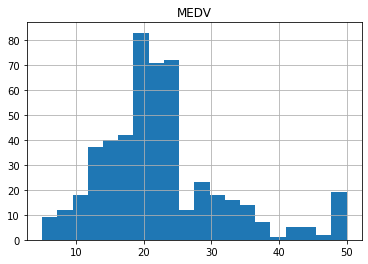

In [5]:
hist = df.hist(column='MEDV',bins=20)

Does this histogram correspond to the statistics above? Try to increase and decrease the number of bins. What happens with the bin representing MEDV = 50 when you increase the number of bins?

To explore our dataset, let's look at correlations. We will use the [Pearson product-moment correlation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html). Correlation is a value between -1 and 1. -1 for a strong negative relation, 0 for no relation at all and 1 for a strong positive relation.
We use a heatmap to visualize the correlations between all pairs of 
features and between the features and the target variable MEDV. 

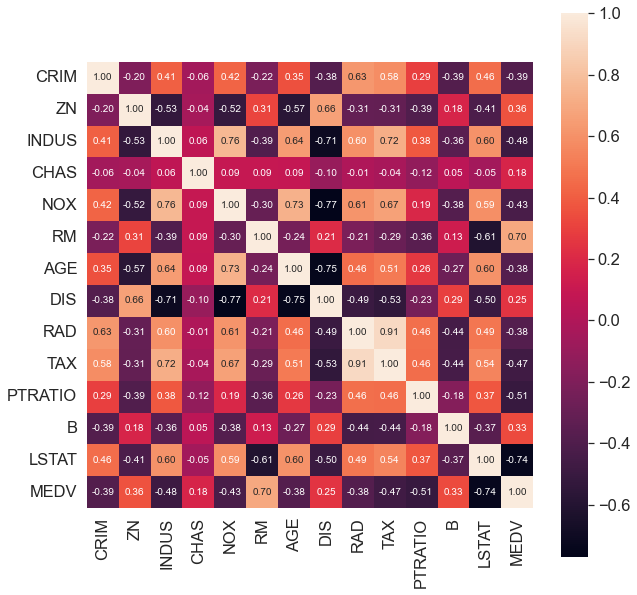

In [6]:
cols = df.columns
cm = np.corrcoef(df[cols].values, rowvar=0)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

The correlation coefficients between all feature values and target variable MEDV can found be in the lowest row. Which feature correlates best with MEDV? And which feature correlates worst?

In the [scatterplot matrix](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) below we plot some feature values against the target variable. For now we think that those are the most interesting and important features for further investigation. As we want to apply a linear regression model, we are interested in (more or less) 
linear relations between the feature values and the target variable.

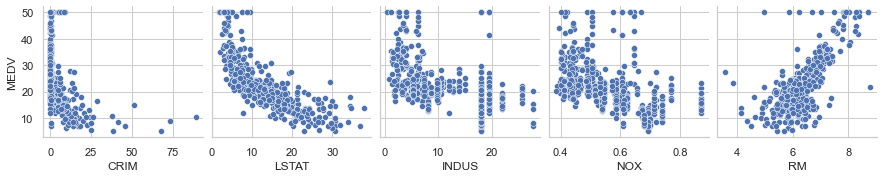

In [7]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, x_vars=['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM'], y_vars=['MEDV'], height=2.5);
plt.show()

Let's select the two features with the highest correlation coefficients with target variable MEDV. We look at the lowest row in the heatmap and select the features with values that are furthest from zero. These features are: LSTAT (-0.74) and RM (0.70). In the scatterplots above it
can be observed that MEDV is decreasing when LSTAT is increasing and MEDV is increasing when RM is increasing. 

## Preprocessing
Let's start with selecting the features LSTAT and RM to fit our
linear regression model. Feature values are stored in $X$ and the 
target variable is stored in $y$.

In [8]:
X = df[['LSTAT','RM']].values
#X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
#X = df[['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM']]
#X = df[['LSTAT']].values
#X = df[['RM']].values
y = df['MEDV'].values

Next, we split the data into a training and test data set. By setting `test_size` to 0.3 we will randomly assign 70% of the data rows to the training set and 30% to the test set. By setting the `random_state` parameter to a fixed value (42 in this case), it is ensured that the train and test sets comprise of the same rows each time the function
`train_test_split()` is called.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42
)

## Modeling

Now we are going to apply linear regression. We construct a model where
we use LSTAT and RM as features and MEDV als target variable.

When fitting this model to the train set we obtain three parameters $b_0$, $b_1$, and $b_2$ in the following function:

$y = b_0 + b_1 x_1 + b_2 x_2$.

Here, $y$ is the predicted value for MEDV, $x_1$ represents the first feature value LSTAT and $x_2$ represents the second feature value RM.

After fitting the model, we obtain values for $b_0$, the so-called intercept, $b_1$, the slope for LSTAT, and $b_2$, the slope for RM.

In [10]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

print('Intercept: %.3f' % slr.intercept_)
for i in range(slr.n_features_in_):
    print('Slope : %.3f' % slr.coef_[i])

Intercept: -0.229
Slope : -0.674
Slope : 4.997


The slope for LSTAT is negative and the slope for RM is positive. This reflects that MEDV increases when LSTAT decreases and MEDV decreases when RM increases. The intercept is an offset corresponding to the value of a non-existing house with LSTAT = 0 and RM = 0.

## Evaluation

Let's predict MEDV for the test set and plot the predicted values against the actual values.

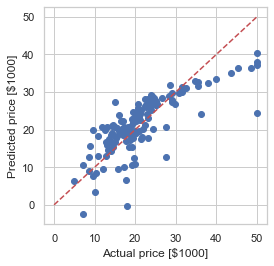

In [11]:
y_test_pred = slr.predict(X_test)

plt.figure(figsize=(4,4))
plt.scatter(y_test,y_test_pred)
plt.plot([0, 50], [0, 50], '--r')
plt.axis('tight')
plt.xlabel('Actual price [$1000]')
plt.ylabel('Predicted price [$1000]')
plt.show()

From the scatter plot, it can be concluded that the predicted values are are somewhat low for higher actual price.

Now let's evaluate the model by computing the root mean squared error (RMSE) and the R2 score. We will use the functions `mean_squared_error` and `r2_score` from [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). To obtain the *root mean squared error*, we compute the square root of the mean squared error using the function `np.sqrt` from numpy.

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_pred = slr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for test set
y_test_pred = slr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

Model performance for training set
--------------------------------------
RMSE is 5.557293000952383
R2 score is 0.6486379416291157


Model performance for test set
--------------------------------------
RMSE is 5.46042834691954
R2 score is 0.5998518447715597


Another way to evaluate your model is to look at so-called residuals. Residuals are the differences between the observed and the predicted values, i.e., Residual = Observed value – predicted value. They are also known as errors and serve as a diagnostic measure when assessing the quality of a model. For more information on residuals, see https://www.statisticshowto.com/residual/

As you may have seen in the scatter plot matrix (below the heatmap), some of the features are not linearly related to the target. We can check for non-linearity of the model by plotting residuals vs. the predicted values. The plot should show no pattern. The presence of a pattern indicates non-linearity. In addition, the points should be horizontally distributed.  

Let's plot the residuals for the train and test set against predicted values.

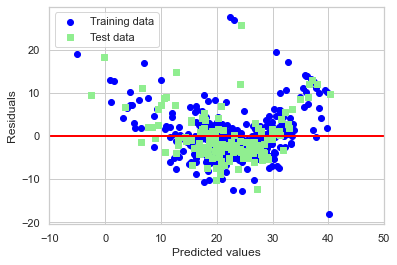

In [13]:
plt.scatter(y_train_pred, y_train - y_train_pred,
    c='blue', marker='o', label='Training data'
)
plt.scatter(y_test_pred, y_test - y_test_pred,
    c='lightgreen', marker='s', label='Test data'
)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

The residual plot above shows a U-shaped pattern, which is an indication of non-linearity. In fact, this is consistent with the scatter plot of predicted values against actual values, from which we concluded that the model predicts lower prices for houses with high actual price.

## Now it is your turn (A)

The features that we include to fit the model may affect the performance of the model. The more features is not always the better. Let's find out.

Step 1: Copy-paste the RMSE and R2 scores for the test set below. We will use this for later reference.

In [14]:
# Model performance for test set
# Features LSTAT and RM
# RMSE is 
# R2 score is 

Step 2: Repeat training and evaluating the model with ALL features. You can simply comment the line <code>X = df[['LSTAT','RM']].values</code> and uncomment the next line. Copy-paste the RMSE and R2 scores for the test set below.

In [15]:
# Model performance for test set
# All features
# RMSE is ...
# R2 score is ...

Step 3: Repeat training and evaluating the model with features CRIM, LSTAT, INDUS, NOX, and RM. As before, you can simply comment the line <code>X = df[['LSTAT','RM']].values</code> and uncomment the appropriate line. Copy-paste the RMSE and R2 scores for the test set below.

In [16]:
# Model performance for test set
# Features CRIM, LSTAT, INDUS, NOX, and RM
# RMSE is ...
# R2 score is ...

From the heatmap it can be observed that LSTAT has the strongest correlation with MEDV. Now let's select LSTAT only and perform linear regression. Again copy-paste the RMSE and R2 scores for the test set below. 

In [17]:
# Model performance for test set
# Feature LSTAT only
# RMSE is ...
# R2 score is ...

From the heatmap it can be observed that also RM has a strong correlation with MEDV. Now let's select RM only and perform linear regression. Again copy-paste the RMSE and R2 scores for the test set below. 

In [18]:
# Model performance for test set
# Feature RM only
# RMSE is ...
# R2 score is ...

Now, compare RMSE and R2 for the four models. Which model is better according to you, and why? Discuss your findings with another student

In [19]:
# Best model is ... 

## RANSAC

Let's create a scatter plot where we plot the actual value of MEDV versus the predicted value of MEDV for the training set.

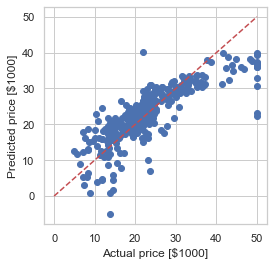

In [20]:
y_train_pred = slr.predict(X_train)

plt.figure(figsize=(4,4))
plt.scatter(y_train,y_train_pred)
plt.plot([0, 50], [0, 50], '--r')
plt.axis('tight')
plt.xlabel('Actual price [$1000]')
plt.ylabel('Predicted price [$1000]')
plt.show()

As you can see there are outliers in our training set: points that are outside of the thick cloud. There are many statistical techniques to remove outliers from your measures. Instead of using such a technique, we will apply a linear regressor that is less susceptible for outliers: [RANdom SAmple Consensus (RANSAC)](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

## Preprocessing
We use the same feature and the same train test split as before.

## Modeling
We use the RANSACRegressor.

In [21]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
    max_trials=1000000,
    min_samples=10,
    loss='absolute_loss',                     
    #residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
    residual_threshold=10.0, 
    random_state=42)
ransac.fit(X_train, y_train)
y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)

Let's plot what are considered outliers and inliers according to the RANSAC regressor.

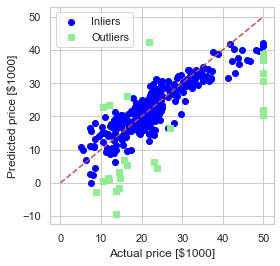

In [22]:
inlier_mask = ransac.inlier_mask_
# outliers = !inliers
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(4,4))
plt.scatter(y_train[inlier_mask],y_train_pred[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(y_train[outlier_mask],y_train_pred[outlier_mask], c='lightgreen', marker='s', label='Outliers')

plt.plot([0, 50], [0, 50], '--r')
plt.axis('tight')
plt.xlabel('Actual price [$1000]')
plt.ylabel('Predicted price [$1000]')
plt.legend(loc='upper left')
plt.show()

## Evaluation

Let's predict MEDV for the test set and plot the predicted values against the actual values.

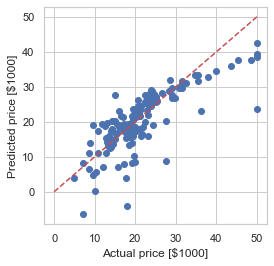

In [23]:
y_test_pred = ransac.predict(X_test)

plt.figure(figsize=(4,4))
plt.scatter(y_test,y_test_pred)
plt.plot([0, 50], [0, 50], '--r')
plt.axis('tight')
plt.xlabel('Actual price [$1000]')
plt.ylabel('Predicted price [$1000]')
plt.show()

As we did before, let's evaluate the RANSAC model by computing the root mean squared error (RMSE) and the R2 score.

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_pred = ransac.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Model performance for training set (RANSAC)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for test set
y_test_pred = ransac.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Model performance for test set (RANSAC)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

Model performance for training set (RANSAC)
--------------------------------------
RMSE is 5.716476973854996
R2 score is 0.6282207134842522


Model performance for test set (RANSAC)
--------------------------------------
RMSE is 5.637450737831918
R2 score is 0.5734863706939217


## Now it is your turn (B)

Try RANSAC for all features and for LSTAT only. As before, copy-paste RMSE and R2 score below.

In [25]:
# Model performance for test set
# Features: all features
# RMSE with LinearRegression is ...
# RMSE with RANSACRegressor is ...
# R2 score with LinearRegression is ...
# R2 score with RANSACRegressor is ...

In [26]:
# Model performance for test set
# Features: LSTAT only
# RMSE with LinearRegression is ...
# RMSE with RANSACRegressor is ...
# R2 score with LinearRegression is ...
# R2 score with RANSACRegressor is ...

How do the models with RANSAC perform compared to linear regression? 

In [27]:
# My answer is ...

## Now it is your turn (C)

Besides `LinearRegression` and `RANSACRegressor` other variations of (linear) regression are supported by sklearn. Have a look at the linear models of sklearn and try some of them using your best feature set. Compare RMSE and R2 score to values you have found thusfar. Can you find a better model than linear regression for this dataset?

https://scikit-learn.org/stable/modules/linear_model.html#

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
mymodel = LinearRegression()
# mymodel = SGDRegressor()
# mymodel = Lasso()
# mymodel = Ridge()
# mymodel = TheilSenRegressor()
# mymodel = SVR()
# mymodel = HuberRegressor()
mymodel.fit(X_train, y_train)

LinearRegression()

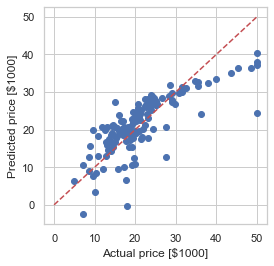

In [29]:
y_test_pred = mymodel.predict(X_test)

plt.figure(figsize=(4,4))
plt.scatter(y_test,y_test_pred)
plt.plot([0, 50], [0, 50], '--r')
plt.axis('tight')
plt.xlabel('Actual price [$1000]')
plt.ylabel('Predicted price [$1000]')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_pred = mymodel.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for test set
y_test_pred = mymodel.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

Model performance for training set
--------------------------------------
RMSE is 5.557293000952383
R2 score is 0.6486379416291157


Model performance for test set
--------------------------------------
RMSE is 5.46042834691954
R2 score is 0.5998518447715597
